**Setting up and Loading Up our Data:**

In [4]:
#installing all the required dependencies
%pip install tensorflow opencv-python matplotlib


#%pip list

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\amir\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (2.17.0)




[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: C:\Users\Amir\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
#importing the dependencies
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

**Removing and cleaning noise from our images:**

In [2]:
data_dir = 'data'
image_exts = ['jpeg', 'jpg', 'bmp', 'png']  #saving image type as a list so it can be accessed in the following for loop, for data cleaning purposes 

In [3]:
#removing all the images that dose'nt meet the requirements  
for image_class in os.listdir(data_dir): 
    # Loop through each image file in the current class folder
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                # Log the image path if it doesn't match allowed extensions
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

**Loading Up our data:**

In [4]:
# loading the image DB, This function automatically labels images
data = tf.keras.utils.image_dataset_from_directory('data')

# This allows for easy iteration over the dataset in NumPy array format.
data_iterator = data.as_numpy_iterator()

#getting the next batch 
batch = data_iterator.next()

Found 305 files belonging to 2 classes.


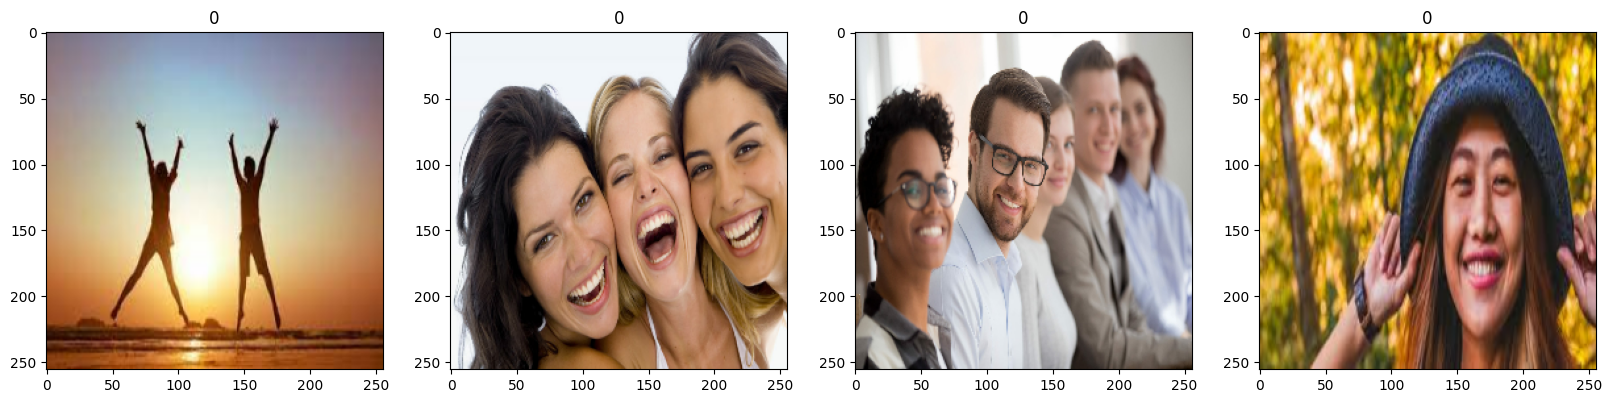

In [5]:
# creating a plot with 4 columns 
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))

# Iterate over the first four images in the batch along with their corresponding labels.
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    # Set the title of the subplot to the corresponding label from the batch.
    ax[idx].title.set_text(batch[1][idx])

**Scaling our Data:**

In [6]:
#normalizing images and image size by 255 to improve training; as well as turning them into tensors 
data = data.map(lambda x, y: (x / 255, y))
#applying the same thing for the next batch
data.as_numpy_iterator().next()

(array([[[[0.972549  , 0.98039216, 0.9764706 ],
          [0.971875  , 0.97971815, 0.9757966 ],
          [0.9688113 , 0.9766544 , 0.97273284],
          ...,
          [0.75686276, 0.80784315, 0.8392157 ],
          [0.75686276, 0.80784315, 0.8392157 ],
          [0.75686276, 0.80784315, 0.8392157 ]],
 
         [[0.97389704, 0.9817402 , 0.9778186 ],
          [0.97322303, 0.98106617, 0.9771446 ],
          [0.9701593 , 0.9780024 , 0.97408086],
          ...,
          [0.75652575, 0.80750614, 0.8388787 ],
          [0.75652575, 0.80750614, 0.8388787 ],
          [0.75652575, 0.80750614, 0.8388787 ]],
 
         [[0.9800245 , 0.98786765, 0.9839461 ],
          [0.9793505 , 0.98719364, 0.9832721 ],
          [0.97628677, 0.9841299 , 0.98020834],
          ...,
          [0.75499386, 0.80597425, 0.8373468 ],
          [0.75499386, 0.80597425, 0.8373468 ],
          [0.75499386, 0.80597425, 0.8373468 ]],
 
         ...,
 
         [[0.72156864, 0.72156864, 0.72156864],
          [0.74549

**Splitting the Dataset:**

In [7]:
#defining our train, test and validation sets. 70%, 10% and 20% respectively 
train_size = int(len(data)*.7)
test_size = int(len(data)*.1)
val_size = int(len(data)*.2)


train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

**Building and creating our model:**

In [8]:
#checking our train variable for inconsistency
train

#saving our sequential model into a variable
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Amir\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
#compiling our model:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

#understanding our model parameters
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

**Training our model:**

In [10]:
logdir='logs'
#using a tensorboard callback for better analysis
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(train, epochs=20, validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step - accuracy: 0.4815 - loss: 1.0342 - val_accuracy: 0.5000 - val_loss: 0.6746
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - accuracy: 0.4860 - loss: 0.6820 - val_accuracy: 0.6719 - val_loss: 0.6650
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.7142 - loss: 0.6597 - val_accuracy: 0.6875 - val_loss: 0.6008
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.7441 - loss: 0.5947 - val_accuracy: 0.8281 - val_loss: 0.5229
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.7627 - loss: 0.5406 - val_accuracy: 0.8438 - val_loss: 0.4519
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.8054 - loss: 0.4442 - val_accuracy: 0.8906 - val_loss: 0.3309
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.8254 - loss: 0.4098 - val_accuracy: 0.8594 - val_loss: 0.3242
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.8690 - loss: 0.3338 - val_accuracy: 0.8594 - val_loss:

**Plotting our models performance**

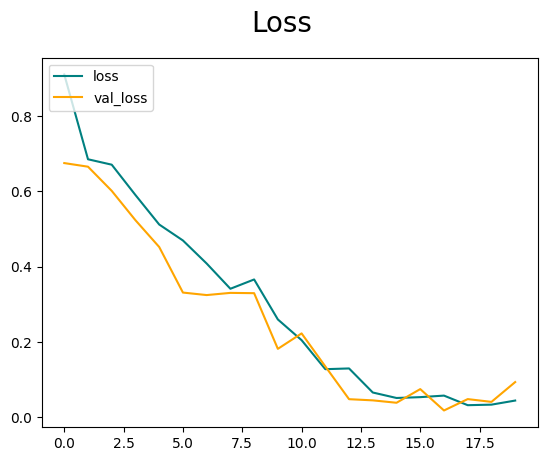

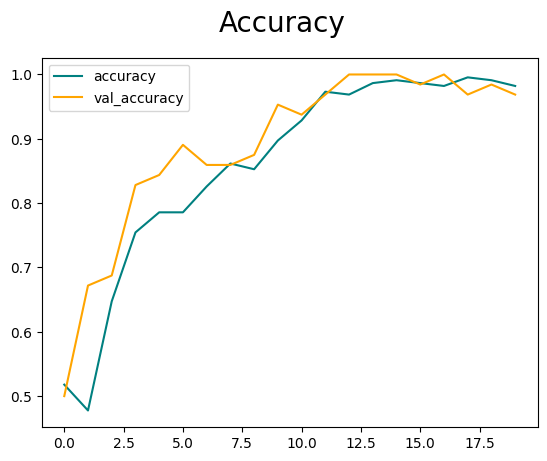

In [11]:
#plotting our loss
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#plotting our accuracy 
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


**Evaluation**

In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

#applying all the metrics to the results 
for batch in test.as_numpy_iterator(): 
    X, y = batch
    cnn = model.predict(X)
    pre.update_state(y, cnn)
    re.update_state(y, cnn)
    acc.update_state(y, cnn)

print(f'PrecisionL {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
PrecisionL 1.0, Recall: 1.0, Accuracy: <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=1.0>>


**Testing the model against new Data**

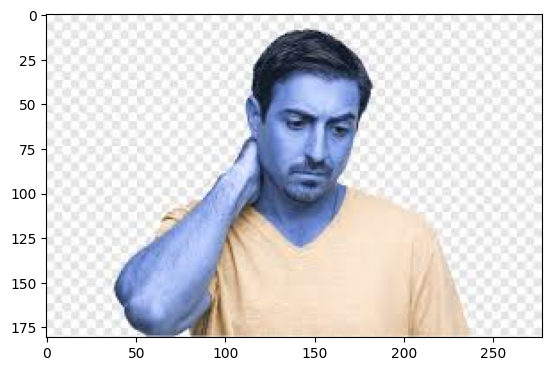

In [44]:
img = cv2.imread('23665193.jpg')
plt.imshow(img)
plt.show()

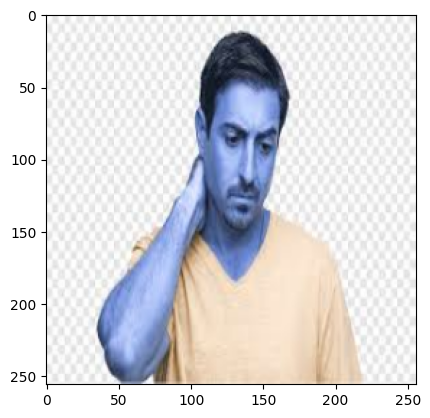

In [45]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [46]:
cnn = model.predict(np.expand_dims(resize/255, 0))

if cnn > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted class is Sad
